In [15]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [16]:
error_maps_path = '../../results/all_channels/error_maps'
error_maps_subdirs = [name for name in os.listdir(error_maps_path)]
print(f'Mapas de Error: {error_maps_subdirs}')

Mapas de Error: ['ball', 'bee_mouth', 'bottles', 'cebolla', 'cellphonecases', 'containers', 'dinosaur', 'door', 'fruit', 'kettle', 'mirrorcard', 'monitors', 'papel_optico', 'pino_leaf', 'plant', 'plate', 'screen', 'tejido_denso']


### Mapas de Error y Métricas (Canal verde)

In [20]:
img_folder = 'kettle'
# img_folder = random.choice(error_maps_subdirs)

In [21]:
I_0 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I0.png'), cv2.COLOR_BGR2RGB)
I_45 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I45.png'), cv2.COLOR_BGR2RGB)
I_90 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I90.png'), cv2.COLOR_BGR2RGB)
I_135 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I135.png'), cv2.COLOR_BGR2RGB)

Máximo del Mapa de Error de la imagen[0]: 163
Máximo del Mapa de Error de la imagen[1]: 185
Máximo del Mapa de Error de la imagen[2]: 124
Máximo del Mapa de Error de la imagen[3]: 126


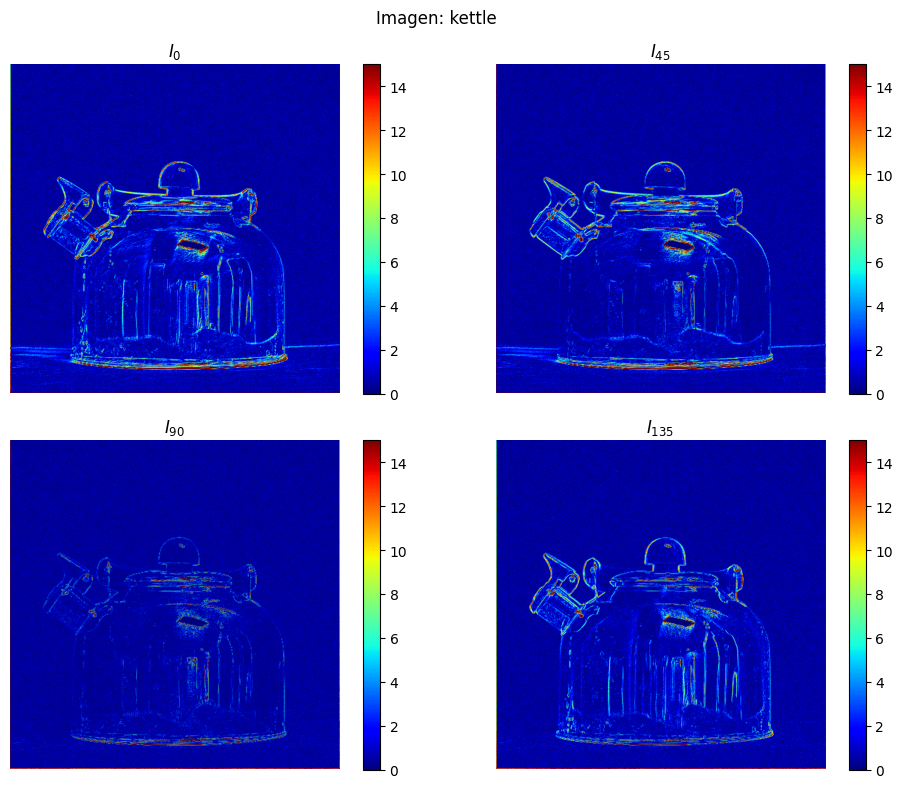

In [22]:
images = [I_0, I_45, I_90, I_135]
titles = [r'$I_0$', r'$I_{45}$', r'$I_{90}$', r'$I_{135}$']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten() # facilita la iteración
plt.suptitle(f'Imagen: {img_folder}')

for i, ax in enumerate(axes):
    img_green_channel = images[i][:,:,1]
    im = ax.imshow(img_green_channel, cmap ='jet', vmax=15)
    fig.colorbar(im, ax = ax)
    print(f'Máximo del Mapa de Error de la imagen[{i}]: {np.max(img_green_channel)}')
    ax.set_title(f'{titles[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
plt.close()

In [23]:
metrics_green_df = pd.read_csv('../../results/green_channel/metrics/metrics_summary.csv')
metrics_green_df

,Image,Polarization angle (°),MSE,SSIM,PNSR
0,ball,0,28.385077,0.930997,33.599903
1,ball,45,21.989342,0.936480,34.708681
2,ball,90,10.743804,0.957423,37.819223
3,ball,135,21.258545,0.939040,34.855468
4,bee_mouth,0,6.503362,0.972201,39.999424
...,...,...,...,...,...
67,screen,135,35.910086,0.970066,32.578639
68,tejido_denso,0,6.777425,0.958716,39.820156
69,tejido_denso,45,9.347192,0.946009,38.423992
70,tejido_denso,90,7.111382,0.960444,39.611264


In [7]:
print('Promedio en el Dataset:')
print('MSE=', np.mean(metrics_green_df['MSE']))
print('SSIM=', np.mean(metrics_green_df['SSIM']))
print('PNSR=', np.mean(metrics_green_df['PNSR']))

Promedio en el Dataset:
MSE= 20.074342448640405
SSIM= 0.9551593414469272
PNSR= 36.54179550691582


### Mapas de Error y Métricas (Todos los canales)

In [8]:
img_folder = 'kettle'

I_0 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I0.png'), cv2.COLOR_BGR2RGB)
I_45 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I45.png'), cv2.COLOR_BGR2RGB)
I_90 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I90.png'), cv2.COLOR_BGR2RGB)
I_135 = cv2.cvtColor(cv2.imread(f'{error_maps_path}/{img_folder}/I135.png'), cv2.COLOR_BGR2RGB)

In [9]:
# Opcional: convertir a negativo
I_0 = 255 - I_0
I_45 = 255 - I_45
I_90 = 255 - I_90
I_135 = 255 - I_135

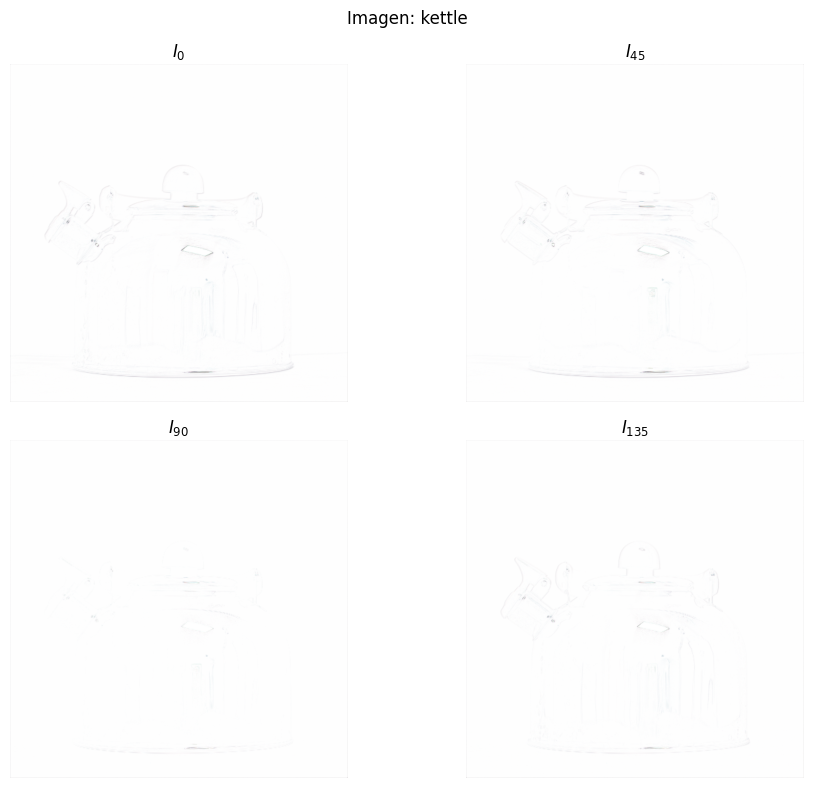

In [10]:
images = [I_0, I_45, I_90, I_135]
titles = [r'$I_0$', r'$I_{45}$', r'$I_{90}$', r'$I_{135}$']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten() # facilita la iteración
plt.suptitle(f'Imagen: {img_folder}')

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f'{titles[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
plt.close()

In [11]:
metrics_df = pd.read_csv('../../results/all_channels/metrics/metrics_summary.csv')
metrics_df

,Image,Polarization angle (°),MSE,SSIM,PNSR
0,ball,0,22.934137,0.938454,34.525980
1,ball,45,17.655507,0.943759,35.662002
2,ball,90,8.471300,0.962578,38.851303
3,ball,135,16.738359,0.946256,35.893675
4,bee_mouth,0,4.190108,0.978845,41.908551
...,...,...,...,...,...
67,screen,135,36.259013,0.971828,32.536644
68,tejido_denso,0,5.758774,0.961074,40.527503
69,tejido_denso,45,6.756667,0.956858,39.833478
70,tejido_denso,90,5.858743,0.963151,40.452759


In [12]:
print('Promedio en el Dataset:')
print('MSE=', np.mean(metrics_df['MSE']))
print('SSIM=', np.mean(metrics_df['SSIM']))
print('PNSR=', np.mean(metrics_df['PNSR']))

Promedio en el Dataset:
MSE= 17.276612878884624
SSIM= 0.9565739259986965
PNSR= 37.01916434590981


### Métricas de Interpolación bilineal (Todos los canales)

In [13]:
metrics_bilinear_df = pd.read_csv('../../reference_results/bilinear/metrics_summary.csv')
metrics_bilinear_df

,Image,Polarization angle (°),MSE,SSIM,PNSR
0,ball,0,30.382930,0.969093,33.304507
1,ball,45,29.980268,0.966744,33.362449
2,ball,90,22.000867,0.966078,34.706406
3,ball,135,21.590251,0.968311,34.788227
4,bee_mouth,0,8.892764,0.976885,38.640436
...,...,...,...,...,...
67,screen,135,11.684450,0.984198,37.454721
68,tejido_denso,0,21.830638,0.956956,34.740139
69,tejido_denso,45,15.991153,0.958024,36.092006
70,tejido_denso,90,15.364448,0.959903,36.265634


In [14]:
print('Promedio en el Dataset:')
print('MSE=', np.mean(metrics_bilinear_df['MSE']))
print('SSIM=', np.mean(metrics_bilinear_df['SSIM']))
print('PNSR=', np.mean(metrics_bilinear_df['PNSR']))

Promedio en el Dataset:
MSE= 19.810367644973024
SSIM= 0.9698503715984896
PNSR= 36.13760957930075
